# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [122]:


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
# api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={your api key} 
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [71]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [125]:
# cities


In [112]:
set_counter = 1
record_counter = 0
df_columns = ['City', 'Lat' , 'Lng',
                'Max Temp', 'Humidity',
                'Cloudiness','Wind Speed',
                'Country', 'Date']
city_data_list = []
for city in cities:
    try:
        url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
        city_data = requests.get(url).json()
        print(f'Processing Record {record_counter} of Set {set_counter} | {city}')
        city_data_list.append([city,city_data['coord']['lat'],city_data['coord']['lon'],
                               city_data['main']['temp_max'],city_data['main']['humidity'],
                               city_data['clouds']['all'], city_data['wind']['speed'],
                               city_data['sys']['country'],city_data['dt']])
    except:
        print('City not found. Skipping...')
        print(city_data)
#     weather_dict['City'].append()
#     weather_dict['City'].append()
#     weather_dict['City'].append()
#     weather_dict['City'].append()
#     weather_dict['City'].append()
#     weather_dict['City'].append()
#     weather_dict['City'].append()
#     weather_dict['City'].append()
    if record_counter == 49:
        record_counter = 0
        set_counter += 1
    record_counter +=1
#     break
citydf = pd.DataFrame(np.array(city_data_list),columns =df_columns)

Processing Record 0 of Set 1 | cartagena
Processing Record 1 of Set 1 | balkanabat
Processing Record 2 of Set 1 | pemangkat
Processing Record 3 of Set 1 | tasiilaq
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | torbay
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | bambous virieux
Processing Record 8 of Set 1 | sidney
Processing Record 9 of Set 1 | yegorlykskaya
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | ponta do sol
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | taft
Processing Record 15 of Set 1 | belyy yar
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | tairua
Processing Record 18 of Set 1 | toronto
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | saskylakh
Processing Record 22 of Set 1 | chuy
Processing Record 23 of Set 1 | suntar
Processing Record 24 of Set 1 | 

Processing Record 31 of Set 4 | am timan
Processing Record 32 of Set 4 | avarua
Processing Record 33 of Set 4 | puerto ayora
Processing Record 34 of Set 4 | katsuura
Processing Record 35 of Set 4 | severo-kurilsk
Processing Record 36 of Set 4 | pontassieve
Processing Record 37 of Set 4 | san ramon
Processing Record 38 of Set 4 | moncton
Processing Record 39 of Set 4 | saint-pierre
Processing Record 40 of Set 4 | lamesa
Processing Record 41 of Set 4 | galle
Processing Record 42 of Set 4 | albion
Processing Record 43 of Set 4 | shchigry
Processing Record 44 of Set 4 | grand gaube
Processing Record 45 of Set 4 | pandan
Processing Record 46 of Set 4 | kurilsk
Processing Record 47 of Set 4 | vitim
Processing Record 48 of Set 4 | sabzevar
Processing Record 49 of Set 4 | rach gia
Processing Record 1 of Set 5 | tecoanapa
Processing Record 2 of Set 5 | keetmanshoop
Processing Record 3 of Set 5 | junction city
Processing Record 4 of Set 5 | dunedin
Processing Record 5 of Set 5 | nefteyugansk
Pro

Processing Record 2 of Set 8 | lompoc
Processing Record 3 of Set 8 | outram
Processing Record 4 of Set 8 | olinda
Processing Record 5 of Set 8 | kayerkan
Processing Record 6 of Set 8 | priladozhskiy
Processing Record 7 of Set 8 | honiara
Processing Record 8 of Set 8 | kalmar
Processing Record 9 of Set 8 | oktyabrskiy
Processing Record 10 of Set 8 | manadhoo
Processing Record 11 of Set 8 | ust-kamchatsk
City not found. Skipping...
{'cod': '404', 'message': 'city not found'}
Processing Record 12 of Set 8 | lagoa
Processing Record 13 of Set 8 | gualaquiza
Processing Record 14 of Set 8 | mocambique
City not found. Skipping...
{'cod': '404', 'message': 'city not found'}
Processing Record 15 of Set 8 | san andres
Processing Record 16 of Set 8 | victoria point
Processing Record 17 of Set 8 | cap malheureux
Processing Record 18 of Set 8 | cleburne
Processing Record 19 of Set 8 | tuatapere
Processing Record 20 of Set 8 | karauzyak
City not found. Skipping...
{'cod': '404', 'message': 'city not 

Processing Record 28 of Set 11 | gao
Processing Record 29 of Set 11 | ixtlahuacan del rio
Processing Record 30 of Set 11 | kumo
Processing Record 31 of Set 11 | sao gabriel da cachoeira
Processing Record 32 of Set 11 | madimba
Processing Record 33 of Set 11 | huacho
Processing Record 34 of Set 11 | blagoyevo
Processing Record 35 of Set 11 | qandala
Processing Record 36 of Set 11 | new plymouth
Processing Record 37 of Set 11 | barkhan
Processing Record 38 of Set 11 | callaway
Processing Record 39 of Set 11 | warburton
Processing Record 40 of Set 11 | tautira
Processing Record 41 of Set 11 | beloha
Processing Record 42 of Set 11 | coahuayana
Processing Record 43 of Set 11 | satitoa
City not found. Skipping...
{'cod': '404', 'message': 'city not found'}
Processing Record 44 of Set 11 | tres arroyos
Processing Record 45 of Set 11 | vallenar
Processing Record 46 of Set 11 | itarema
Processing Record 47 of Set 11 | totness
Processing Record 48 of Set 11 | conceicao da barra
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [113]:
citydf['Lat'] = citydf['Lat'].astype(float)
citydf['Lng'] = citydf['Lng'].astype(float)
citydf['Max Temp'] = citydf['Max Temp'].astype(float)
citydf['Humidity'] = citydf['Humidity'].astype(float)
citydf['Cloudiness'] = citydf['Cloudiness'].astype(float)
citydf['Wind Speed'] = citydf['Wind Speed'].astype(float)
citydf.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [114]:
citydf.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cartagena,10.40,-75.51,299.86,83.0,96.0,0.67,CO,1595833037
1,balkanabat,39.51,54.37,313.60,15.0,4.0,3.53,TM,1595833308
2,pemangkat,1.17,108.97,302.14,71.0,67.0,1.27,ID,1595833308
3,tasiilaq,65.61,-37.64,279.15,87.0,100.0,3.10,GL,1595833308
4,thompson,55.74,-97.86,287.15,100.0,90.0,2.60,CA,1595833308


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [129]:

too_hum_index = citydf.loc[citydf['Humidity'] >= 100].index

#  Get the indices of cities that have humidity over 100%.
# too_hum_index
citydf.iloc[:,1:7].describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,21.069019,16.347478,294.610368,69.388792,51.269702,3.642715
std,33.018924,91.033983,7.902300,21.152897,40.297544,2.416143
min,-54.800000,-179.170000,269.580000,1.000000,0.000000,0.150000
25%,-4.000000,-68.035000,289.560000,58.500000,2.000000,1.905000
50%,25.090000,20.280000,295.790000,73.000000,54.000000,3.100000
75%,46.650000,94.265000,300.085000,86.500000,93.500000,4.755000
max,78.220000,179.320000,313.600000,100.000000,100.000000,14.900000


In [116]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = citydf.drop(too_hum_index, inplace = False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cartagena,10.40,-75.51,299.86,83.0,96.0,0.67,CO,1595833037
1,balkanabat,39.51,54.37,313.60,15.0,4.0,3.53,TM,1595833308
2,pemangkat,1.17,108.97,302.14,71.0,67.0,1.27,ID,1595833308
3,tasiilaq,65.61,-37.64,279.15,87.0,100.0,3.10,GL,1595833308
6,atuona,-9.80,-139.03,299.72,72.0,3.0,11.62,PF,1595833309


In [117]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
clean_city_data[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']].to_csv('City_Data.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

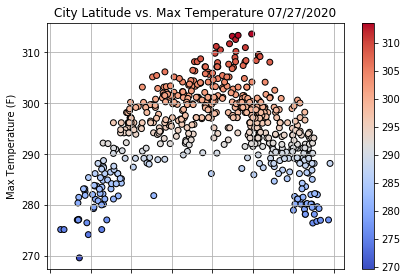

In [156]:
clean_city_data = pd.read_csv('City_Data.csv')
today =datetime.date.today().strftime("%m/%d/%Y")
heatValue = clean_city_data['Max Temp']

clean_city_data.plot('Lat','Max Temp',kind= 'scatter',title = f'City Latitude vs. Max Temperature {today}',
                    grid = True, edgecolors="black",c = heatValue,cmap = 'coolwarm', s =35)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
# plt.tight_layout()
plt.show()

## Latitude vs. Humidity Plot

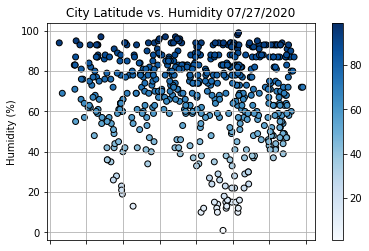

In [174]:
heatValue = clean_city_data['Humidity']
clean_city_data.plot('Lat','Humidity',kind= 'scatter',title = f'City Latitude vs. Humidity {today}',
                    grid = True, edgecolors="black",c = heatValue,cmap = 'Blues', s =35)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
# plt.tight_layout()
plt.show()

## Latitude vs. Cloudiness Plot

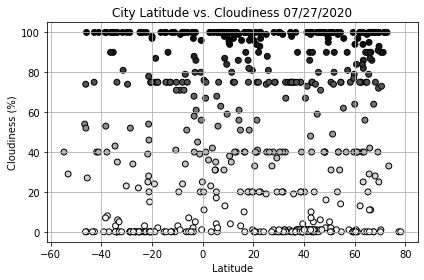

In [161]:
heatValue = clean_city_data['Cloudiness']
clean_city_data.plot('Lat','Cloudiness',kind= 'scatter',title = f'City Latitude vs. Cloudiness {today}',
                    grid = True, edgecolors="black",c = heatValue, s =35)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
# plt.tight_layout()
plt.show()

## Latitude vs. Wind Speed Plot

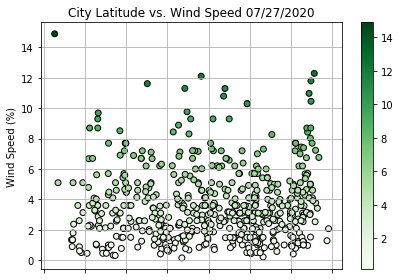

In [162]:
heatValue = clean_city_data['Wind Speed']
clean_city_data.plot('Lat','Wind Speed',kind= 'scatter',title = f'City Latitude vs. Wind Speed {today}',
                    grid = True, edgecolors="black",c = heatValue,cmap = 'Greens', s =35)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
# plt.tight_layout()
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [164]:
# Create Northern and Southern Hemisphere DataFrames
northern = clean_city_data.loc[clean_city_data['Lat'] >= 0]
southern = clean_city_data.loc[clean_city_data['Lat'] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.377917688977745


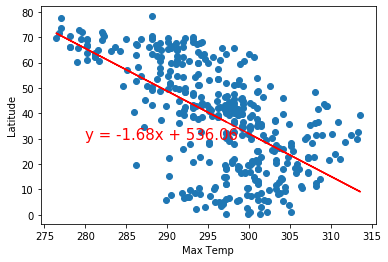

In [183]:
x_values = northern['Max Temp']
y_values = northern['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,northern['Lat'].min()+5),fontsize=15,color="red")
print(f'The r-squared is: {rvalue**2}')
# plt.ylim(0,90)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6575493083143091


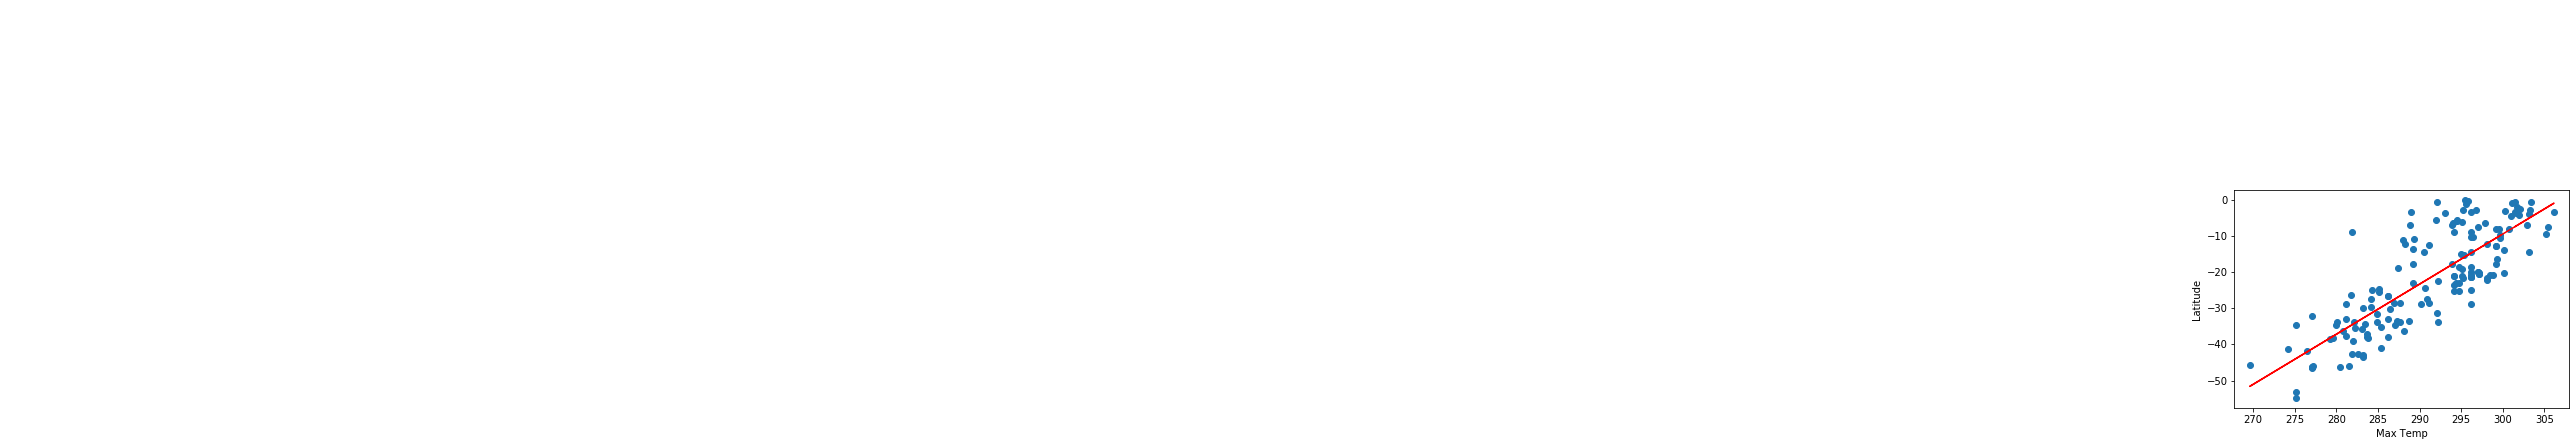

In [175]:
x_values = southern['Max Temp']
y_values = southern['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,southern['Lat'].max()+5),fontsize=15,color="red")
print(f'The r-squared is: {rvalue**2}')
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


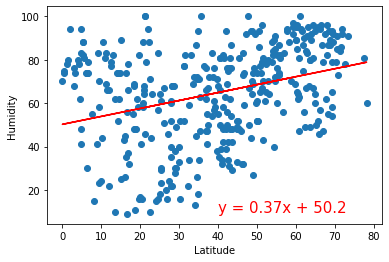

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


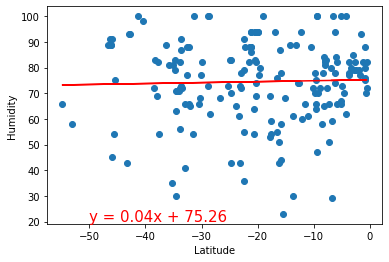

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


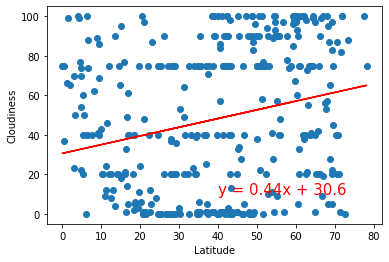

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


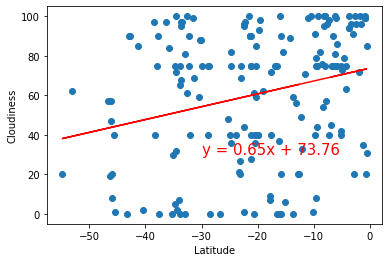

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


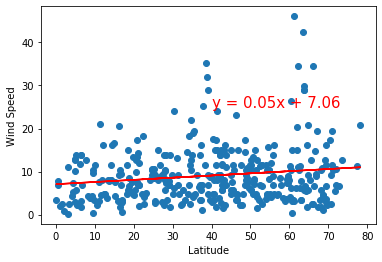

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


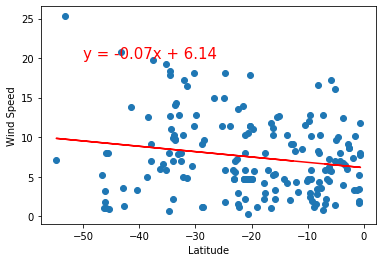